# Libraries and load data

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set_style('darkgrid')
colors = ["windows blue","amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
sns.set_palette('hls')
sns.set_context("notebook", 1.5)
alpha = 0.7

In [209]:
train = pd.read_csv('train.csv')

In [210]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

In [ ]:
train.describe()

# Cleaning data

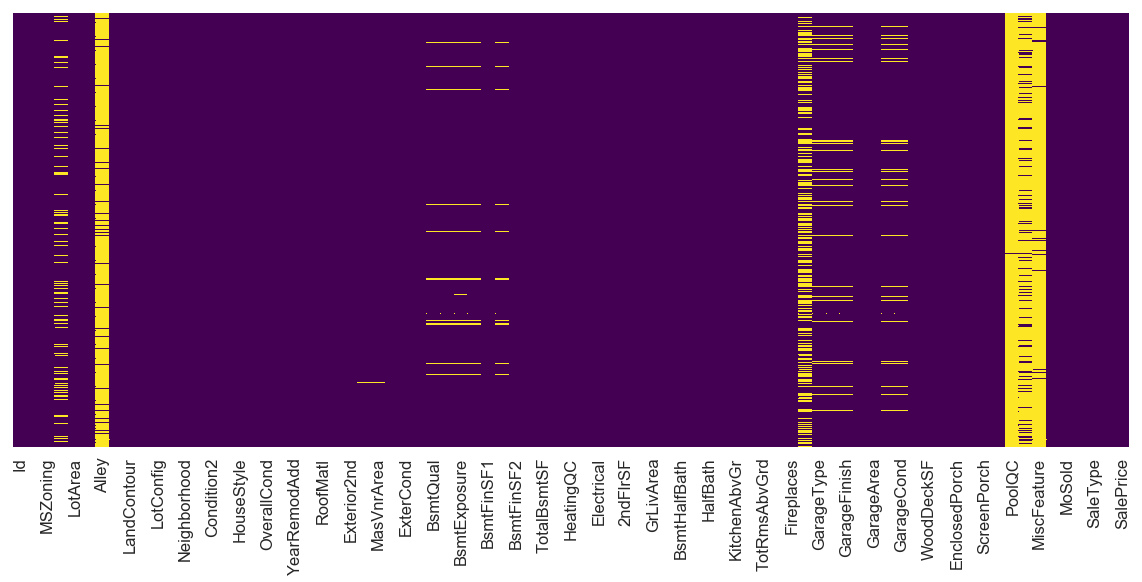

In [211]:
plt.figure(figsize=(20,8))
sns.heatmap(train.isna(),yticklabels=False, cbar=False, cmap='viridis')

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality
		
       GdPrv  Good Privacy
       MnPrv  Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Altough in my first attempt to create a predictive model I will not use categorical variables, I replace the Nan's in the variables 'Alley', 'FireplaceQu', 'PoolQC','Fence', 'MiscFeature' by:
No alley access, No Fireplace, No Pool, No Fence, None

In [213]:
train['Alley'].fillna('No alley access', inplace=True);
train['FireplaceQu'].fillna('No Fireplace', inplace=True);
train['PoolQC'].fillna('No Pool', inplace=True);
train['Fence'].fillna('No Fence', inplace=True);
train['MiscFeature'].fillna('None', inplace=True);
train['BsmtQual'].fillna('No Basement', inplace=True);
train['BsmtCond'].fillna('No Basement', inplace=True);
train['BsmtExposure'].fillna('No Basement', inplace=True);
train['BsmtFinType1'].fillna('No Basement', inplace=True);
train['BsmtFinType2'].fillna('No Basement', inplace=True);
train['GarageType'].fillna('No Garage', inplace=True);
train['GarageYrBlt'].fillna('No Garage', inplace=True);
train['GarageFinish'].fillna('No Garage', inplace=True);
train['GarageQual'].fillna('No Garage', inplace=True);
train['GarageCond'].fillna('No Garage', inplace=True);

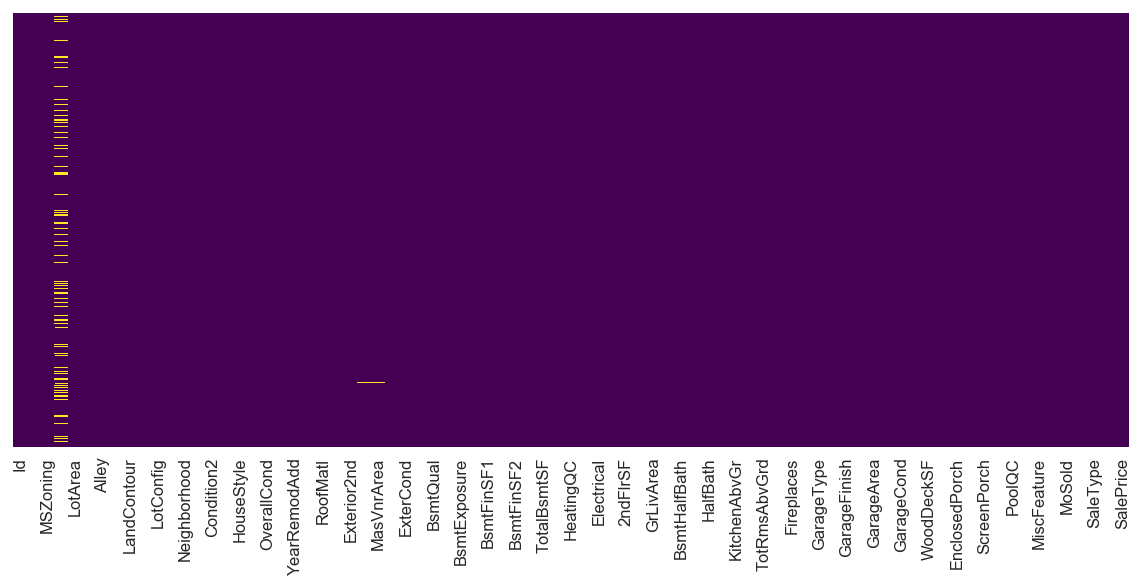

In [214]:
plt.figure(figsize=(20,8))
sns.heatmap(train.isna(),yticklabels=False, cbar=False, cmap='viridis')

#### Replace LotFontage Nan's

In [215]:
train['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

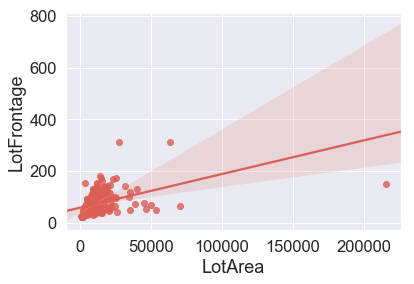

In [216]:
sns.regplot('LotArea', 'LotFrontage',data=train)
plt.show()

In [217]:
df_LotFrontage_noNA = train[train['LotFrontage'].isna() == False]

In [218]:
lm = LinearRegression()
model = lm.fit(pd.DataFrame(df_LotFrontage_noNA['LotFrontage']),df_LotFrontage_noNA['LotArea'])
lm.score(pd.DataFrame(df_LotFrontage_noNA['LotFrontage']),df_LotFrontage_noNA['LotArea'])

0.18155696502214747

$R^2$ is too bad, so we can not obtain the Nan's Lotfrontage values from a linear model between this variables and Lotarea variable

In [219]:
df_LotFrontage_NA = train[train['LotFrontage'].isna() == True]

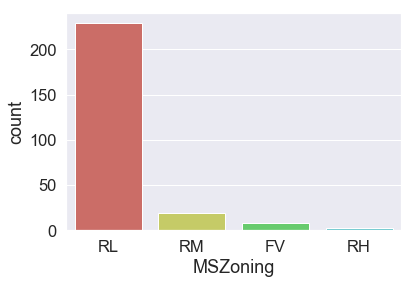

In [220]:
sns.countplot(x='MSZoning', data=df_LotFrontage_NA)  
#The missing values correspond to RL zone (residential Low density )

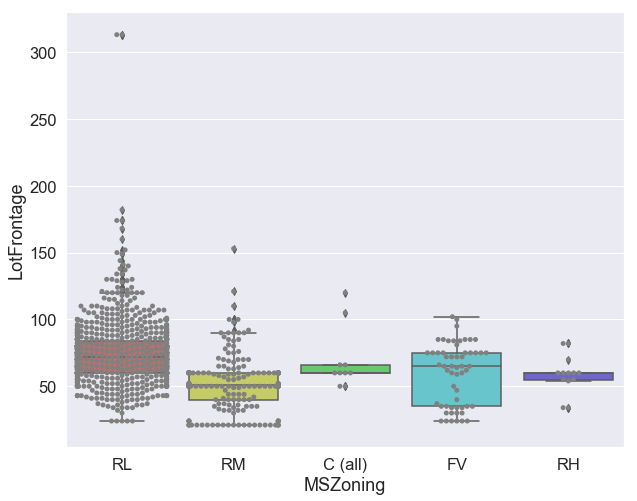

In [221]:
plt.figure(figsize=(10,8))
sns.boxplot(x='MSZoning', y='LotFrontage', data=train)
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='MSZoning', y='LotFrontage', data=train, color="grey")

In [222]:
RL_LotFrontage = df_LotFrontage_noNA[df_LotFrontage_noNA['MSZoning'] == 'RL']['LotFrontage'].mean()
RM_LotFrontage = df_LotFrontage_noNA[df_LotFrontage_noNA['MSZoning'] == 'RM']['LotFrontage'].mean()
FV_LotFrontage = df_LotFrontage_noNA[df_LotFrontage_noNA['MSZoning'] == 'FV']['LotFrontage'].mean()
RH_LotFrontage = df_LotFrontage_noNA[df_LotFrontage_noNA['MSZoning'] == 'RH']['LotFrontage'].mean()

In [223]:
def input_LotFrontage(cols):
    
    MSZoning = cols[0]
    LotFrontage = cols[1]

    if pd.isnull(LotFrontage):
        if MSZoning=='RL':
            return RL_LotFrontage  
        if MSZoning=='RM':
            return RM_LotFrontage 
        if MSZoning=='FV':
            return FV_LotFrontage 
        if MSZoning=='RH':
            return RH_LotFrontage
    else:
        return LotFrontage

In [224]:
train['LotFrontage'] = train[['MSZoning', 'LotFrontage']].apply(input_LotFrontage, axis=1)

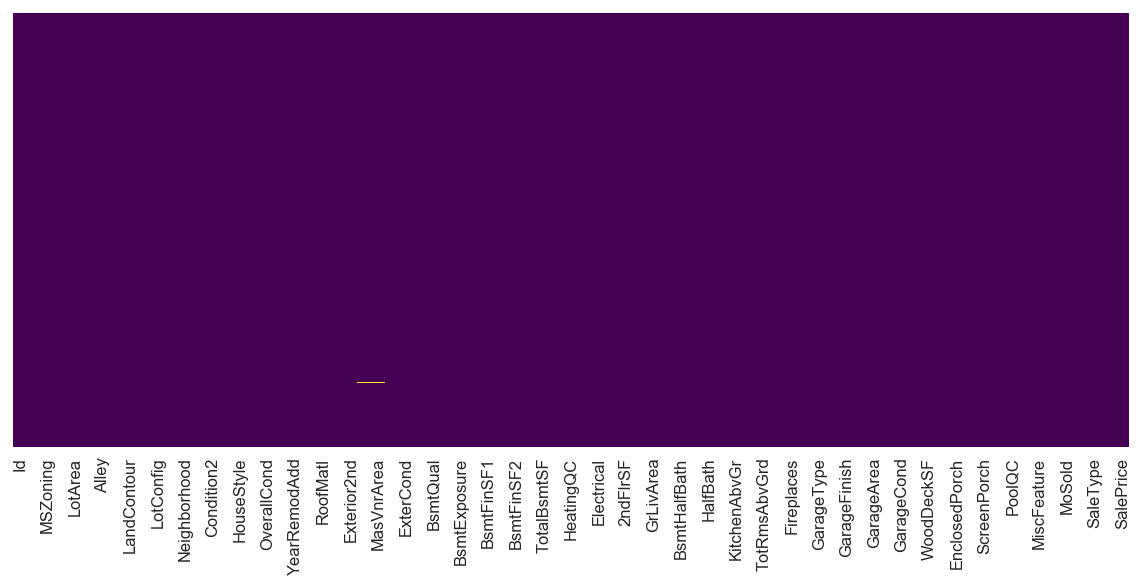

In [225]:
plt.figure(figsize=(20,8))
sns.heatmap(train.isna(),yticklabels=False, cbar=False, cmap='viridis')

In [226]:
train.dropna(inplace=True)   #Delete the rows with missing values

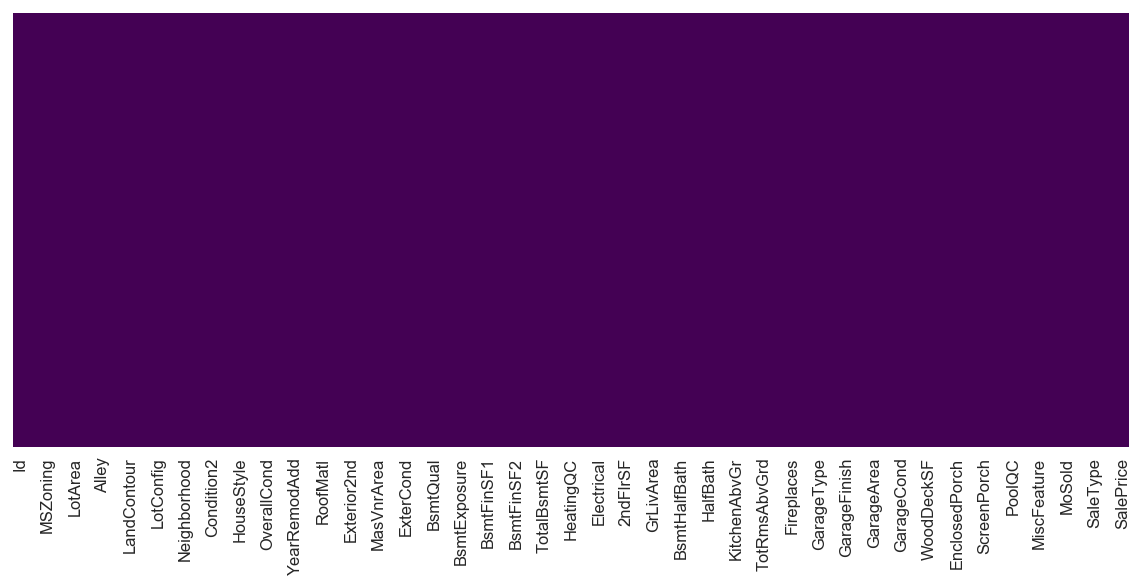

In [227]:
plt.figure(figsize=(20,8))
sns.heatmap(train.isna(),yticklabels=False, cbar=False, cmap='viridis')

Now we have the dataset with no missing values and we can start to build the prediction model.